<H1>TP3 Analyse de données<H1>

## Contexte
    
Dans ce TP, nous utiliserons l'exemple du jeu de données du Titanic, un énorme paquebot pour l'époque qui fait naufrage en 1912 à la suite d'une collision avec un iceberg, lors de son voyage inaugural de Southampton à New York.
   * Nous avons accès à des informations sur une partie des passagers (1309 passagers) du Titanic. 
   * Pourquoi certains passagers ont survécu et d'autres sont morts?
   * Commencons l'analyse de données
   
![img](test/titanic.jpeg)


## Chargement des données
Les données sont dans un tableau au format CSV (comma separated values):

In [1]:
import pandas as pd
import numpy as np

titanic = pd.read_csv("test/data-titanic.csv")

Ensuite, on OBSERVE ce qu’on a!!

In [2]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.shape

(1309, 12)

In [4]:
titanic.describe(include='all')
#titanic.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


Les colonnes sont:

* PassengerId : Passenger Id

* Survived : True (1) / False (0)

* Pclass : Passenger ticket class : Class 1, 2 and 3.

* Name : Name of the passenger

* Sex : Sex of the passenger male/female

* Age : Age in years

* Sibsp :	# of siblings / spouses aboard the Titanic	

* Parch	: # of parents / children aboard the Titanic	

* Ticket :	Ticket number	

* fare :	Passenger fare	

* Cabin : Cabin number

* Embarked : Embarkation port ( C : Cherbourg; Q Queenstown; S Southampton)

## Question / Objectif
<strong>Pourquoi certains passagers ont survécu et d’autres sont morts?<strong>

On veut trouver les colonnes qui expliquent le 0/1 dans Survived et construire un modèle qui permettrait d’expliquer au mieux Survived étant donné nos informations.

On va commencer par observer nos données, en répondant à des questions descriptives:
1. Quel sexe a le plus de chances de survie ?
2. Est-ce que les enfants ont eu plus de chances de survie ?
3. Calculer la proportion de survie selon le port d'embarquement.

### Etape 1: Supprimer les NAN de la colonnes "Survived"
La colonne "Survived" a des valeurs manquantes (891 disponibles/1309). Comme la plupart des passagers et passagères sont mort, on peut supposer que Survived =0.

Attention ceci est un choix. Toujours garder en tête qu’il modifie vos résultats et peut donc modifier vos interpétations ! Ici, c’est vraiment à la marge

In [5]:
titanic["Survived"] = titanic["Survived"].fillna(0.0)

### Quel sexe a le plus de chances de survie ?
* Comparaison de la proportion d’hommes et de femmes passagers du Titanic qui ont survécu

* Utilisons groupby, qui permet de produire des tables de synthèses par catégories:

In [25]:
titanic.groupby(['Sex','Survived']).count()['PassengerId']

Sex     Survived
female  0.0         233
        1.0         233
male    0.0         734
        1.0         109
Name: PassengerId, dtype: int64

#### Autres tables de synthèse

In [7]:
passengers = titanic.groupby('Sex')['PassengerId'].count()
passengers

Sex
female    466
male      843
Name: PassengerId, dtype: int64

In [8]:
survivors = titanic.groupby('Sex')['Survived'].sum()
survivors

Sex
female    233.0
male      109.0
Name: Survived, dtype: float64

In [9]:
summary = pd.DataFrame({"Survivants": survivors,
                        "Passagers": passengers,
                        "%": round(100*survivors / passengers,1)})
summary

,Survivants,Passagers,%
Sex,,,
female,233.0,466,50.0
male,109.0,843,12.9


#### Visualisation

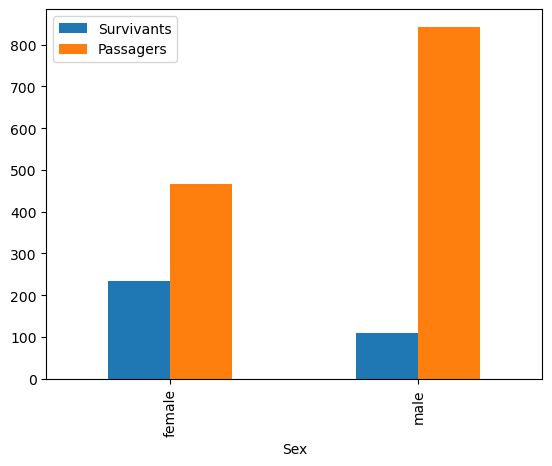

In [10]:
import matplotlib.pyplot as plt
summary[["Survivants", "Passagers"]].plot(kind='bar');

Le même graphique, avec titre et labels:

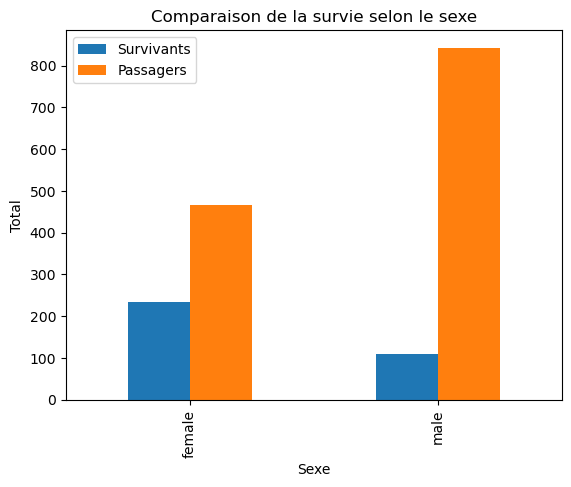

In [11]:
summary[["Survivants", "Passagers"]].plot(kind='bar');
plt.xlabel('Sexe')
plt.ylabel('Total')
plt.title('Comparaison de la survie selon le sexe');

#### Conclution
* Observation :

  * 26.1% des passengers ont survécus dont 50% des femmes contre seulement 12.9% des hommes

  * Il y a plus d’hommes que de femmes sur le paquebot

* Interprétation : Les femmes ont eu plus de chances de survivre que les hommes

Pour aller plus loin, on pourrait regarder à quel age les hommes et femmes avaient la plus grande chance de survie.

### Est-ce que les enfants ont eu plus de chances de survie ?
* On va commencer par séparer les enfants des adultes selon l’age. Problème, on a des données manquantes.

#### Gestion des données manquantes
Il manque certaines informations. Que feriez-vous ?

On pourrait décider de supprimer les individus sans informations sur l’âge (pensez à vérifier les dimensions de votre table!)

In [12]:
print("Si j'enlève toutes les lignes contenant un 'NaN': ", titanic.dropna().shape)
titanic_filt_age = titanic.loc[titanic['Age'].notna(),:]
print("\nSi je n'enlève que les 'NaN' de la colonne Age : ", titanic_filt_age.shape)

Si j'enlève toutes les lignes contenant un 'NaN':  (270, 12)

Si je n'enlève que les 'NaN' de la colonne Age :  (1046, 12)


Maintenant on va créer une nouvelle colonne indiquant si l’on est adulte

In [13]:
titanic['Adult'] = titanic['Age'] >=18  
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adult
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


Et quid des individus dont on ne connait pas l’age ?

In [14]:
titanic_filt_age['Adult'] = titanic_filt_age['Age'] >=18  
passengers = titanic_filt_age.groupby(['Adult','Sex']).count()['PassengerId']
passengers

C:\Users\GHASSEN\AppData\Local\Temp\ipykernel_6372\2058578820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_filt_age['Adult'] = titanic_filt_age['Age'] >=18


Adult  Sex   
False  female     72
       male       82
True   female    316
       male      576
Name: PassengerId, dtype: int64

In [15]:
survivors = titanic_filt_age.groupby(['Adult','Sex'])['Survived'].sum()
survivors

Adult  Sex   
False  female     38.0
       male       23.0
True   female    159.0
       male       70.0
Name: Survived, dtype: float64

#### Résumons et Visualisons

In [16]:
passengers = titanic_filt_age.groupby(['Adult','Sex'])['PassengerId'].count()
summary = pd.DataFrame({"Survivants": survivors,
                       "Passagers": passengers,
                       "%": round(survivors/passengers*100, 1)})
summary.index=['Girl','Boy','Woman','Man']
summary

,Survivants,Passagers,%
Girl,38.0,72,52.8
Boy,23.0,82,28.0
Woman,159.0,316,50.3
Man,70.0,576,12.2


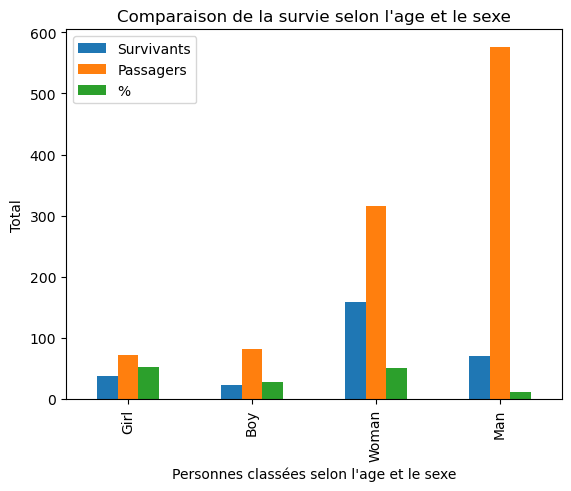

In [17]:
summary.plot(kind='bar')
plt.xlabel("Personnes classées selon l'age et le sexe")
plt.ylabel('Total')
plt.title("Comparaison de la survie selon l'age et le sexe");

* Observations:

 * Il y a plus d’adultes que d’enfants.

 * Ainsi, on a respectivement 52.8%, 28%, 50.3% et 12.2% de survivant-es parmi les filles, garcons, femmes et hommes.

* Interprétation: 
  Quelque soit la catégorie, les personnes de sexe féminin ont une plus grande chance de survie que les masculins. Les enfants de sexe masculin ont une plus grande chance de survie que les adultes mais ce n’est pas réciproque pour les personnes de sexe féminin. Pour aller plus loin, que pourrions nous regarder ?

### Calculer la proportion de survie selon le port d’embarquement

La colonne du port d’embarquement a des valeurs manquantes. Comme la plupart des passagers et passagères sont montées à Southampton, on peut supposer que les données manquantes viennent de là.


In [18]:
titanic["Embarked"] = titanic["Embarked"].fillna('S')

In [19]:
survivors_per_port = titanic.groupby('Embarked')['Survived'].sum()
passengers_per_port = titanic.groupby('Embarked')['PassengerId'].count()
comparaison_port_survie = pd.DataFrame({"Survivants": survivors_per_port,
                                        "Passagers": passengers_per_port,
                                        "%": round(survivors_per_port/passengers_per_port*100, 1)})
comparaison_port_survie

,Survivants,Passagers,%
Embarked,,,
C,93.0,270,34.4
Q,30.0,123,24.4
S,219.0,916,23.9


Text(0.5, 1.0, 'Comparaison de survie selon le port')

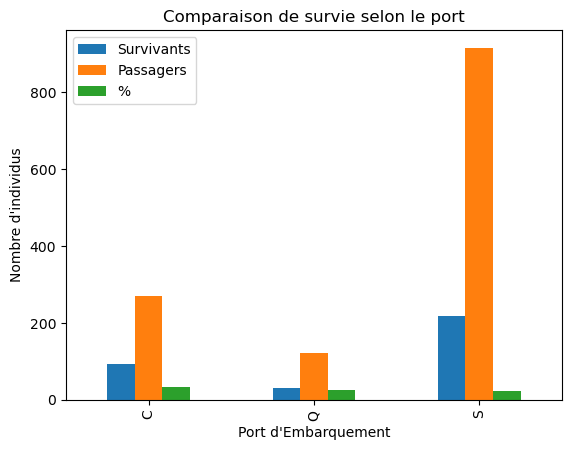

In [20]:
comparaison_port_survie.plot(kind='bar')
plt.xlabel("Port d'Embarquement")
plt.ylabel("Nombre d'individus")
plt.title('Comparaison de survie selon le port')

La figure indique que:

* la plupart des individus sont montés à Southampton puis Cherbourg puis Queenstown.

* le nombre de survivants et survivantes est plus grand selon le meme ordre.

* Respectivement 219/916; 93/270 et 30/123 ont survécus selon le port d’embarquement Southampton, Cherbourg, Queenstown.

* L’analyse de proportionnalité nous informe que les individus étant montés à Cherbourg ont eu plus de chance de survie. Pourquoi cela ?

### C'est quoi la corrélation ? Et la causalité ?
Il existe trois types de relations statistiques:

* corrélation positive: si une variable augmente, l’autre aussi.

* corrélation négative: si une variable augmente, l’autre diminue.

* absence de corrélation: si une variable augmente, l’autre peut ou pas varier sans lien entre elle.

Exemple de corrélation:

![img](test/correlationChocolatNobels.png)

Cette corrélation est tirée d’un papier de 2012 par F. Messerli.

C. Pissarides, prix Nobel d’économie en 2010 suite à ce papier à commenté:

« To win a Nobel Prize you have to produce something that others haven’t thought about - chocolate that makes you feel good might contribute a little bit. Of course it’s not the main factor but… anything that contributes to a better life and a better outlook in your life then contributes to the quality of your work. »

1. Décrivez la figure

2. Qu’est-ce qu’on observe?

3. Qu’en conclut-on?

Depuis, il a été montré que la corrélation positive est due à la richesse économique (economic wealth).

Alors qu’est ce que la causalité ?

Dans notre exemple, la richesse économique implique

* une plus grande dépense en recherche

* ce qui implique une corrélation positive avec le nombre de prix Nobel.

Par ailleurs et indépendamment, la richesse économique implique :

* de plus grandes dépenses dans les produits de luxe, dont le chocolat.

Causalité n’est pas corrélation
* Les corrélations relèvent de l'observation;

* Les causalités relèvent de l'interprétation !

Retour au port d’embarquement. Pourquoi on survit plus si on a embarqué a Cherbourg ?

Hypothèse 1: Il y a plus de femmes à Cherbourg (?)

Hypothèse 2: On est plus riche à Cherbourg et plus on est riche plus on a survécu (?)



#### Hypothèse 1: Il y a plus de femmes à Cherbourg

In [21]:
female_per_port = titanic[titanic['Sex']=='female'].groupby('Embarked')['PassengerId'].count()
male_per_port = titanic[titanic['Sex']=='male'].groupby('Embarked')['PassengerId'].count()
pd.DataFrame({"Female": female_per_port,
              "Male" : male_per_port,
              "Total": passengers_per_port,
              "% Female": female_per_port / passengers_per_port
              })

,Female,Male,Total,% Female
Embarked,,,,
C,113,157,270,0.418519
Q,60,63,123,0.487805
S,293,623,916,0.319869


Il n’y a pas plus d’individus féminins à Cherbourg qu’à Queenstown.

#### Hypothèse 2: on est plus riche à Cherbourg et plus on est riche plus on a survécu (?)

In [22]:
survivors_per_class = titanic.groupby('Pclass')['Survived'].sum()
passengers_per_class = titanic['Pclass'].value_counts()
pd.DataFrame({"Survivants": survivors_per_class,
              "Passagers": passengers_per_class,
              "%": round(survivors_per_class/passengers_per_class*100, 1)})

,Survivants,Passagers,%
Pclass,,,
1,136.0,323,42.1
2,87.0,277,31.4
3,119.0,709,16.8


Il y a une corrélation entre la classe et la probabilité de survie!

On peut même l’expliquer causalement !

Regardons la répartitions entre classes, selon le port d’embarquement

In [23]:
pclass1_per_port = titanic[titanic['Pclass']==1].groupby('Embarked').count()['PassengerId']
pclass2_per_port = titanic[titanic['Pclass']==2].groupby('Embarked').count()['PassengerId']
pclass3_per_port = titanic[titanic['Pclass']==3].groupby('Embarked').count()['PassengerId']


pd.DataFrame({'Classe 1': pclass1_per_port,
              'Classe 2': pclass3_per_port,
              'Classe 3': pclass3_per_port,
              'Passengers': passengers_per_port,
              '% Classe 1': round(pclass1_per_port/passengers_per_port*100,1)})

,Classe 1,Classe 2,Classe 3,Passengers,% Classe 1
Embarked,,,,,
C,141,101,101,270,52.2
Q,3,113,113,123,2.4
S,179,495,495,916,19.5


#### Observations

* Les passagers ayant embarqué à Cherbourg regroupent principalement des individus de première classe.

* Les passagers qui embarquent à Queenstown (Irlande) sont principalement de la classe 2 et 3 des migrants en route vers les États-Unis.

#### Conclusions

* Les passagers ayant embarqué à Cherbourg arrivent de Paris (France) et sont plutôt riches.

* Il semble que la classe plus que le port d’embarquement a une relation de causalité avec la survie (à vérifier).

### Corrélation (point mathématique)
Le coefficient de [corrélation linéaire de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) se calcule facilement en python . Il correspond à la version normalisée par la standard deviation (écart-type) de la covariance. 
Mathematiquement, on a:
$$
\rho_{xy} = \frac{\sigma_{xy}}{\sigma_x\sigma_y}
$$

varie entre -1 et 1 et représente la force de la relation linéaire qui existe entre les 2 vecteurs/séries.

 * 0 : pas de corrélation,
 * 1 : corrélation positive parfaite (si on connait x alors on peut déduire y, les points sont alignés le long d'une droite)
 * -1: corrélation négative parfaite (idem)
 * en réalité, on a souvent des corrélations intermédiaires
« The intention of this contribution was to show that the correlation between chocolate consumption per capita and the number of Nobel laureates per capita (as reported by Messerli, 2012) will vanish if one controls for relevant other variables and if one uses a sophisticated estimation technique. » par Prinz A. L. (2020)
![img](test/correlationsChocolat.jpeg)
On peut calculer la matrice de corrélation qui correspond à la corrélation entre les colonnes d’une table, et utiliser une carte de chaleur (heatmap en anglais) pour mieux la visualiser:

In [24]:
titanic.corr()
titanic.corr().style.background_gradient(cmap='coolwarm', axis=1)
#remarque on ne peut pas calculer de correlation linéaire 
#avec des données ayant plus de 2 catégories comme le port d'embarquement
# il faudrait faire une ANOVA (off-topic)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

Attention: par défaut, pour attribuer des couleurs aux nombres dans une carte de chaleur, Pandas applique une standardisation par colonne. Le "axis=None" assure que la normalisation est appliquée à l’ensemble des valeurs de la table.

Variante, avec "Seaborn":

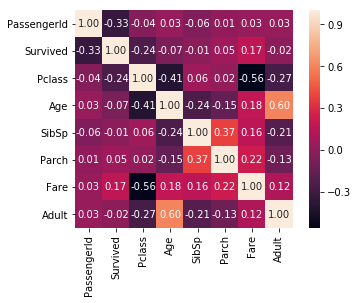

In [56]:
import seaborn as sns

sns.heatmap(titanic.corr(), fmt='0.2f', annot=True, square=True);